In [1]:
import control

In [12]:
import numpy as np

In [11]:
num = np.array([0.01781, 0.01585], dtype= float)
den = np.array([1, -1.679, 0.7047])
dt = 0.1

gz= control.TransferFunction(num, den, dt)
gz

TransferFunction(array([0.01781, 0.01585]), array([ 1.    , -1.679 ,  0.7047]), 0.1)

In [13]:
yout, T = control.step_response(gz)

In [14]:
import matplotlib.pyplot as plt

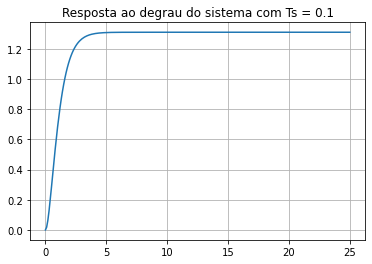

In [19]:
plt.title("Resposta ao degrau do sistema com Ts = "+ str(dt) )
plt.grid()
plt.plot(yout, T)